In [18]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import seaborn as sns; sns.set()

 # [gyro_x, gyro_y, gyro_z, accel_x, accel_y, accel_z]

In [19]:
wave_data = []
wave_data.append(pd.read_csv('./wave/data_3_np.csv'))
wave_data[0]


,-2.734375000000000000e+01,3.639526000000000181e+02,1.708984000000000059e+00,1.467651000000000039e+00,-9.497070000000000511e-02,1.711548000000000069e+00
0,-57.739250,382.0190,-6.530761,1.540161,-0.001709,0.676514
1,-36.621090,302.1240,36.437990,1.006226,-0.310547,-0.327881
2,-23.986810,229.1260,55.603020,0.485840,0.067627,-0.584106
3,-40.161130,158.5693,38.085940,0.120361,0.035278,-0.649292
4,-6.408691,109.2529,49.194330,-0.181030,0.210205,-0.669556
...,...,...,...,...,...,...
243,-25.024410,114.3799,68.115230,0.529053,-0.252563,3.793457
244,-49.194330,216.0644,41.564940,1.257813,-0.549439,3.576782
245,-82.763660,253.9062,89.660630,1.725098,-1.216919,3.184082
246,-36.499020,290.4053,143.981900,2.426392,-0.409302,3.938599


In [20]:
gyro_x = wave_data[0].iloc[:, 0].values
gyro_y = wave_data[0].iloc[:, 1].values
gyro_z = wave_data[0].iloc[:, 2].values
accel_x = wave_data[0].iloc[:, 3].values
accel_y = wave_data[0].iloc[:, 4].values
accel_z = wave_data[0].iloc[:, 5].values


def check_data_pattern(d):
    x = np.linspace(0, len(d), len(d))
    y = d

    plt.plot(x, y, 'o', color='black')


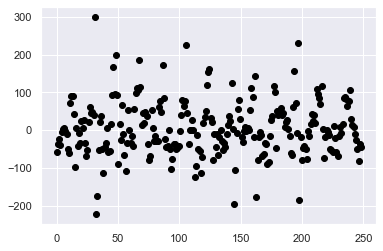

In [21]:
check_data_pattern(gyro_x)

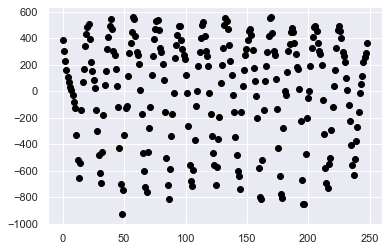

In [22]:
check_data_pattern(gyro_y)

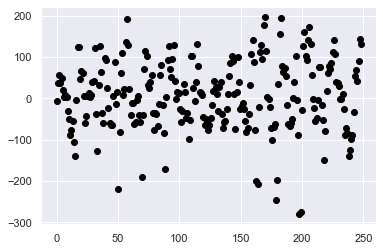

In [23]:
check_data_pattern(gyro_z)

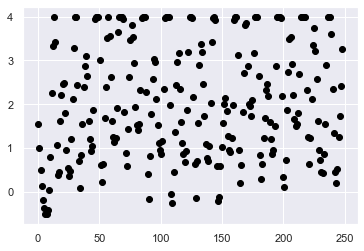

In [24]:
check_data_pattern(accel_x)

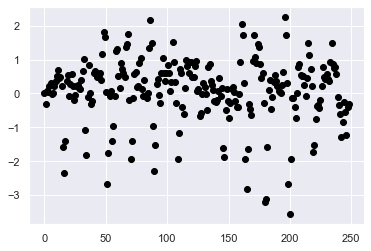

In [25]:
check_data_pattern(accel_y)

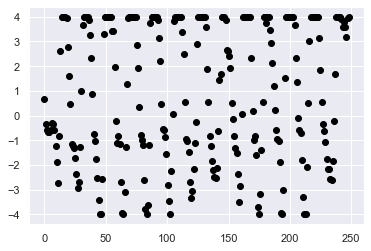

In [26]:
check_data_pattern(accel_z)

In [2]:
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


def train_model(vertical_swipe, horizontal_swish):
     vertical_swipe   = np.asarray(vertical_swipe)
     horizontal_swish = np.asarray(horizontal_swish)
     X = np.append(vertical_swipe, horizontal_swish, axis=0)
     y = np.append(np.zeros(vertical_swipe.shape[0]), np.ones(horizontal_swish.shape[0]))
     model = KNeighborsClassifier(n_neighbors=15)
     model.fit(X,y)
     
     return model; 

def predict_model(model,data):
     data = np.array(data)
     if np.any(np.isnan(data)) or np.any(np.isinf(data)):
          return 0
     return model.predict(data.reshape(1,-1))[0]

def run_training_and_prediction(vertical_swipe, horizontal_swish, data):
     model = train_model(vertical_swipe, horizontal_swish)
     return predict_model(model, data)

In [ ]:
# Play with the two values (10.0, 0.1) to experiment with 
# harder margins (higher values) or softer (lower).
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(Xs, ys)
    plot_sets(Xs, ys, axi)
    
    # If you want to see the support vectors, toggle plot_support.
    plot_svc_decision_function(model, axi, plot_support=False)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:f}'.format(C), size=14)